In [ ]:
#init 

In [2]:
import geopandas as gpd
import pandas as pd

In [28]:
df = pd.read_csv("./villes_france_30000.csv")
villes = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))
villes.set_crs("EPSG:4326")

,idx,INSEE,nom,latitude,longitude,population,geometry
0,1,75100,Paris,48.867,2.333,2152423,POINT (2.33300 48.86700)
1,2,13200,Marseille,43.300,5.400,800550,POINT (5.40000 43.30000)
2,3,69380,Lyon,45.750,4.850,415487,POINT (4.85000 45.75000)
3,4,31555,Toulouse,43.600,1.433,358688,POINT (1.43300 43.60000)
4,5,6088,Nice,43.700,7.250,342439,POINT (7.25000 43.70000)
...,...,...,...,...,...,...,...
29995,29996,52195,Farincourt,47.700,5.683,68,POINT (5.68300 47.70000)
29996,29997,70090,Boursieres,47.617,6.050,68,POINT (6.05000 47.61700)
29997,29998,54224,Germonville,48.400,6.217,68,POINT (6.21700 48.40000)
29998,29999,73049,Bonvillaret,45.567,6.300,68,POINT (6.30000 45.56700)


In [29]:
from shapely.geometry import Polygon

In [30]:
ile_de_france=Polygon([(2.91, 48.52),(2.91, 49.12),(1.82, 49.12),(1.82, 48.52)])

In [32]:
villes[villes.geometry.within(ile_de_france)]

,idx,INSEE,nom,latitude,longitude,population,geometry
0,1,75100,Paris,48.867,2.333,2152423,POINT (2.33300 48.86700)
34,35,92012,Boulogne-Billancourt,48.833,2.250,101743,POINT (2.25000 48.83300)
37,38,93048,Montreuil,48.867,2.433,94754,POINT (2.43300 48.86700)
39,40,95018,Argenteuil,48.950,2.250,93096,POINT (2.25000 48.95000)
40,41,93066,Saint-Denis,48.933,2.358,89988,POINT (2.35800 48.93300)
...,...,...,...,...,...,...,...
28639,28640,95633,Vaudherland,49.000,2.483,93,POINT (2.48300 49.00000)
28640,28641,77193,Forfry,49.050,2.850,93,POINT (2.85000 49.05000)
29306,29307,95212,Epiais-les-Louvres,49.033,2.550,80,POINT (2.55000 49.03300)
29359,29360,78917,Rhodon,48.717,2.067,79,POINT (2.06700 48.71700)


In [34]:
cities = villes[(~villes.geometry.within(ile_de_france)) | (villes["nom"] == "Paris")]

In [39]:
final_cities=cities[:50]

<AxesSubplot:>

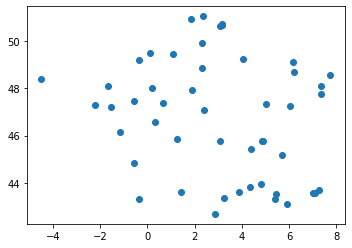

In [45]:
final_cities.plot()